Upload the dataset into colab using google.colab library.

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Saving dataset_testproject.csv to dataset_testproject (1).csv
User uploaded file "dataset_testproject (1).csv" with length 1485 bytes


The uploaded file `dataset_testproject.csv` is located in the `/content/` directory of your Colab environment. You can verify its presence using the `os.listdir()` command:

In [9]:
# import os
# print(os.listdir('/content'))

Display the dataset as table using Pandas.

In [10]:
import pandas as pd

df = pd.read_csv('dataset_testproject.csv')
display(df.head())
# Display function is environment depend function(jupyter or colab) to show rich output fo various datatypes.

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


Remove the unwanted indexing column using iloc (integer-location based indexing) to select specific rows and columns from DataFrame. And ' : ' before comma means select rows and 1; means select all column starting from 1st column.

In [11]:

df = df.iloc[:,1:]


print(df.head())

   cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0


Know the shape(dimension) of the dataset.

In [12]:
df.shape

(100, 3)

For EDA - Use matplotlib to plot the graph. Here, scattergraph is used

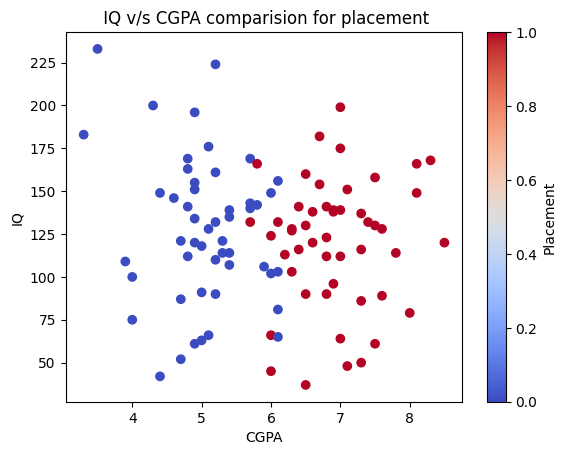

In [24]:
import matplotlib.pyplot as plt

plt.scatter(x='cgpa', y='iq',c='placement', cmap='coolwarm', data=df)
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.colorbar(label='Placement')
plt.title(" IQ v/s CGPA comparision for placement")
plt.show()

Feature Selection - Find the dependent and independent variables.
Here, independent variables are 'cgpa' and 'iq' and dependent variable is placement.

In [14]:
x = df.iloc[:,0 : 2]
y = df.iloc[:, -1]

Spliting the dataset into training and testing parts.

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

Scaling the dataset.

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training the model using Logistic Regression.

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

Finding the accuracy and maybe changing model using sklearn.mertics.

In [18]:
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8


Visualizing the decision boundary of the trained logistic regression classifier using mlxtend library.


<Axes: >

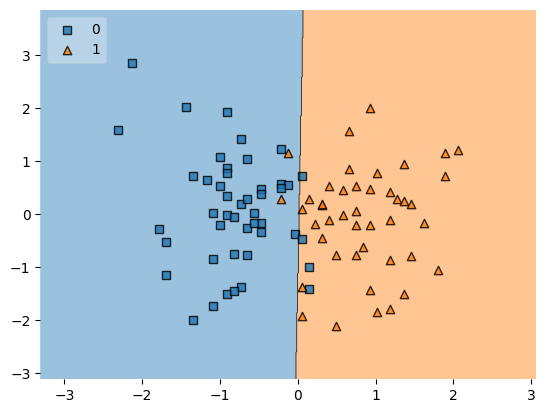

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend = 2)

Exporting the trained model using pickel library. The model can be deployed in the servers using heruko, aws, gcp.

In [20]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))